In [22]:
#https://towardsdatascience.com/social-distancing-to-slow-the-coronavirus-768292f04296
import numpy as np
import matplotlib.pyplot as plt
def base_seir_model(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

In [23]:
# Define parameters
t_max = 100
dt = .1
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000.
init_vals = 1. - 1./N, 1./N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
params = alpha, beta, gamma
# Run simulation
results = base_seir_model(init_vals, params, t)

(0, 200)

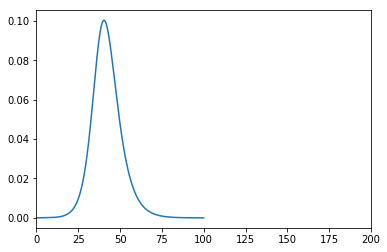

In [24]:
plt.plot(t,results[:,2])
plt.xlim(0,200)

In [16]:
def seir_model_with_soc_dist(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma, rho = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

In [25]:
# Define parameters
t_max = 500
dt = .1
t2 = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000.
init_vals = 1. - 1./N, 1./N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
rho=.5
params = alpha, beta, gamma,rho
# Run simulation
results2 = seir_model_with_soc_dist(init_vals, params, t2)

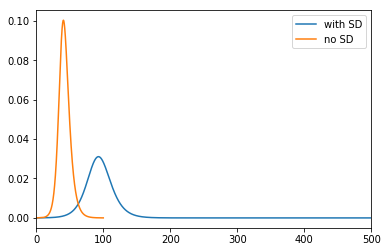

In [26]:
plt.plot(t2,results2[:,2], label = 'with SD')
plt.plot(t,results[:,2], label = 'no SD')
plt.xlim(0,500)
plt.legend()

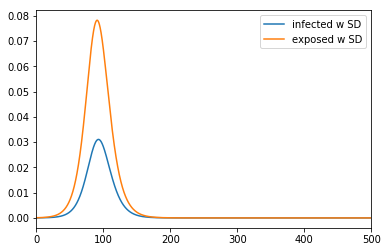

In [27]:
plt.plot(t2,results2[:,2], label = 'infected w SD')
plt.plot(t2,results2[:,1], label = 'exposed w SD')
plt.xlim(0,500)
plt.legend()